<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/02-Prep-Datos-Metricas-Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Preparación de Datos y Métricas de Evaluación
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
               Alisson Manosalvas &bull; 07 Dic 2025
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller veremos como aplicar diferentes técnicas para la carga y preparación de datos y las métricas de modelos.
   
Para eso necesitaremos las siguientes librerías:

In [86]:
# Paquetes necesarios
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler, MinMaxScaler, RobustScaler, StandardScaler, Normalizer, QuantileTransformer, PowerTransformer
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

---
## <font color='264CC7'> Lectura de Datos </font>


Primero, necesitas cargar el conjunto de datos "Boston house prices", que contiene información sobre el valor de las casas en diferentes áreas de Boston basado en múltiples factores. Este conjunto de datos está disponible para su descarga [aquí](https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data); la descripción de las variables  de puede encontrar [aquí](https://github.com/rupakc/UCI-Data-Analysis/blob/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.names).

En los ejercicios de esta actividad, usaremos como variable objetivo para regresión "MEDV", que representa la mediana del valor de las casas en una zona de Boston (en miles de dólares, k$); y para clasificación, la variable "CHAS", que indica si la casa está cerca del río Charles (1) o no (0).

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos "boston house-prices dataset" y muestra:
<ul>
  <li>El número y nombre de los atributos.</li>
  <li>El número de filas del conjunto de datos.</li>
  <li>Verifica si hay "missing values" y en qué columnas.</li>
</ul>
</div>

1. Carga del conjunto de datos

In [3]:
url = "https://raw.githubusercontent.com/rupakc/UCI-Data-Analysis/refs/heads/master/Boston%20Housing%20Dataset/Boston%20Housing/housing.data"

columnas = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM","AGE", "DIS", "RAD", "TAX", "PTRATIO", "B",
    "LSTAT", "MEDV"]

df = pd.read_csv(url, delim_whitespace=True, header=None)
df.columns = columnas

/tmp/ipython-input-4252367708.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, header=None)


1.1  Número y nombre de los atributos

In [7]:
print("Número de atributos:", df.shape[1])
print("Nombres de los atributos:")
print(list(df.columns))

Número de atributos: 14
Nombres de los atributos:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


1.2 Número de filas del conjunto de datos

In [10]:
print("Número de filas del conjunto de datos:", df.shape[0])

Número de filas del conjunto de datos: 506


1.3 Verifica si hay "missing values" y en qué columnas.

In [11]:
print("Valores faltantes por columna:")
print(df.isnull().sum())

Valores faltantes por columna:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


---
## <font color='264CC7'> Análisis de los datos </font>

### <font color='264CC7'> Análisis estadístico básico </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un análisis estadístico básico:
<br>

<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calcula la frecuencia.</li>
      <li>Realiza un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calcula estadísticos descriptivos básicos como media, mediana, desviación estándar, entre otros.</li>
      <li>Realiza un histograma para las variables INDUS, AGE y MEDV.</li>
    </ul>
</ul>
    
<hr>
Sugerencia: Puedes usar la librería 'pandas' y sus funciones 'describe' y 'value_counts', así como las funciones 'bar' e 'hist' de matplotlib.
</div>


**2.1 Variables Categóricas:**

2.1.1 Calcular la frecuencia

In [13]:
print("Frecuencia de CHAS:")
print(df["CHAS"].value_counts())

Frecuencia de CHAS:
CHAS
0    471
1     35
Name: count, dtype: int64


In [27]:
total = df.shape[0]
chas_1 = df["CHAS"].value_counts()[1]

porcentaje = (chas_1 / total) * 100
print('Alrededor del {porcentaje}% de las casas están cerca del río Charles'.format(porcentaje=porcentaje))

Alrededor del 6.91699604743083% de las casas están cerca del río Charles


2.1.2 Gráfico de barras

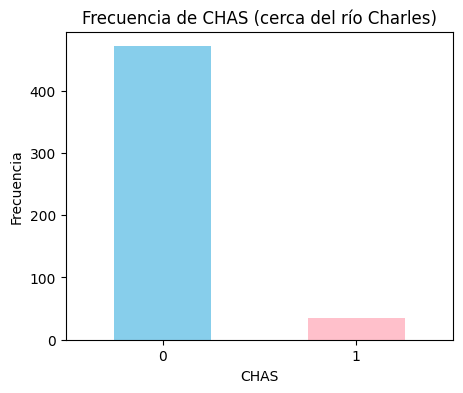

In [17]:
plt.figure(figsize=(5,4))
df["CHAS"].value_counts().plot(kind='bar', color=['skyblue', 'pink'])
plt.title("Frecuencia de CHAS (cerca del río Charles)")
plt.xlabel("CHAS")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.show()

**2.2 Variables numéricas:**

2.2.1 Calcular estadísticos descriptivos básicos como media, mediana, desviación estándar, entre otros.

In [19]:
print("Estadísticos descriptivos: ")
print(df.describe())

Estadísticos descriptivos: 
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   

2.2.2 Realiza un histograma para las variables INDUS, AGE y MEDV.

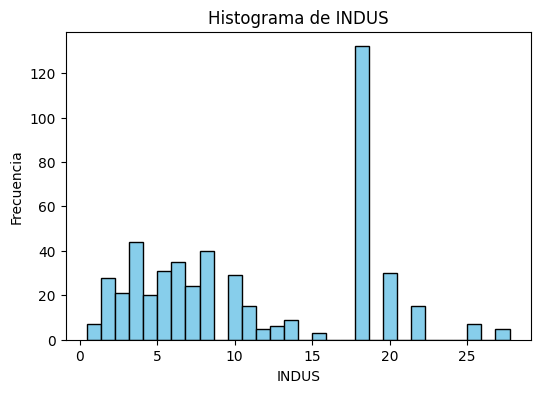

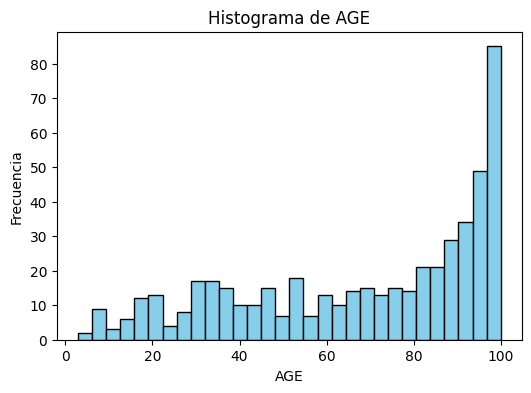

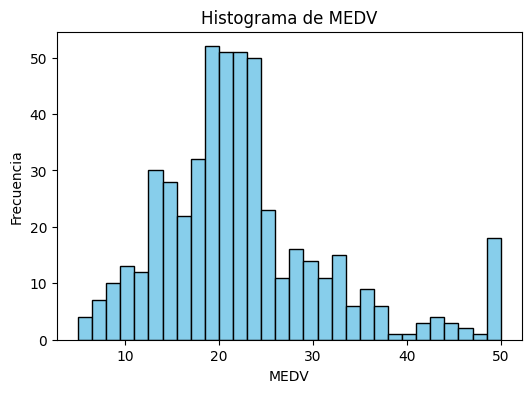

In [44]:
variables = ["INDUS", "AGE", "MEDV"]

for var in variables:
    plt.figure(figsize=(6,4))
    plt.hist(df[var], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Histograma de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
Comenta los resultados.
</div>

En cuanto a las **Variables Categóricas** hay un fuerte desbalance ya que (redondeando) solo el 7% de viviendas están cerca del rió Charles, mientras que el 93% no.

En cuanto a las **Variables Numéricas**, los estadíticos muestran una alta dispersión, con los histogramas confirmamos que INDUS está sesgda a la derecha, AGE se concentra en valores altos, por lo que inferimos que hay predominio de viviendas antiguas y MEDV se concentra en valores entre 15 y 30 y cuenta con un ímite de 50

### <font color='264CC7'> Análisis exploratorio de los datos </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Realiza un gráfico del histograma de valores de la variable MEDV, separado por los posibles valores de CHAS. Para comparar mejor los valores de MEDV según las diferentes clases de CHAS, los histogramas deben estar sobrepuestos. Agrega una leyenda para identificar a qué clase corresponde cada histograma.
    
El objetivo es observar cómo se distribuye el valor de la respuesta MEDV en función de la clase CHAS, para identificar visualmente si este atributo categórico está relacionado con diferentes valores de la respuesta.
    
<hr>
Sugerencia: Usa la función "hist" de la librería "matplotlib", utilizando el parámetro "alpha" para que se aprecien los histogramas sobrepuestos.<br>
Sugerencia: Para una mejor comparación, considera representar la densidad de probabilidad en lugar del número de entradas por bin. Esto permite usar la misma escala para cada clase y facilita la comparación. Puedes usar el parámetro "density" de la misma función "hist".  
</div>

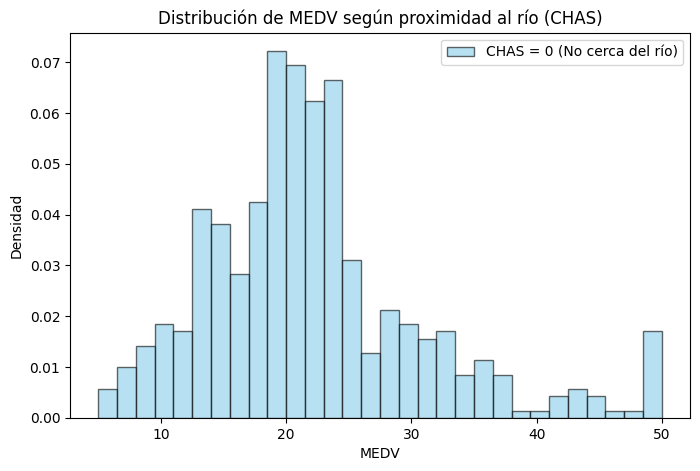

In [50]:
medv_c0 = df[df["CHAS"] == 0]["MEDV"]
medv_c1 = df[df["CHAS"] == 1]["MEDV"]
plt.figure(figsize=(8,5))
plt.hist(medv_c0, bins=30, alpha=0.6, density=True,
         label="CHAS = 0 (No cerca del río)", color="skyblue", edgecolor="black")
plt.title("Distribución de MEDV según proximidad al río (CHAS)")
plt.xlabel("MEDV")
plt.ylabel("Densidad")
plt.legend()

plt.show()

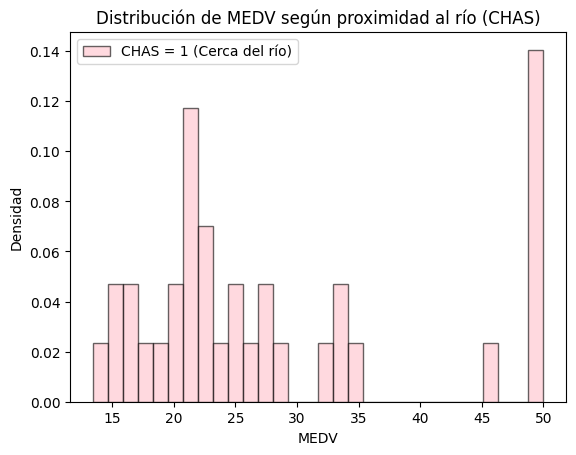

In [46]:
plt.hist(medv_c1, bins=30, alpha=0.6, density=True,
         label="CHAS = 1 (Cerca del río)", color="pink", edgecolor="black")
plt.title("Distribución de MEDV según proximidad al río (CHAS)")
plt.xlabel("MEDV")
plt.ylabel("Densidad")
plt.legend()

plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Mirando los histogramas, ¿te parece que el atributo CHAS tendrá algún peso a la hora de predecir la mediana del precio de las casas, MEDV? ¿Porqué?
</div>

Con los histogramas se puede obvservar que las viviendas cercanas al río tienen valores MEDV más altos en comparación con las que no están cerca del río. Y a pesar de que el grupo de CHAS=1 es pequeño, su distribución muestra unos picos más concentrados en zonas de precios elevados, en cambio CHAS=0 presentan una distribución más extendida y centrada en valores entre 17 y 25, lo que sugiere que la cercanía al río está asociada con lo precios de vivienda más altos, por loq ue CHAS probablemente sí aporte información útil en un modelo predictivo de MEDV

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Calcula y muestra la correlación entre todos los atributos numéricos y la variable respuesta MEDV.
</div>


In [52]:
correlacion=df.corr(numeric_only=True)["MEDV"]
print(correlacion)

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Representa gráficamente las relaciones entre todas las parejas de variables numéricas (sin incluir la variable respuesta) del conjunto de datos. El objetivo de este ejercicio es observar y analizar gráficamente las correlaciones entre las variables.
<hr>Sugerencia: Puedes usar la función "pairplot" de la librería 'seaborn'.
</div>


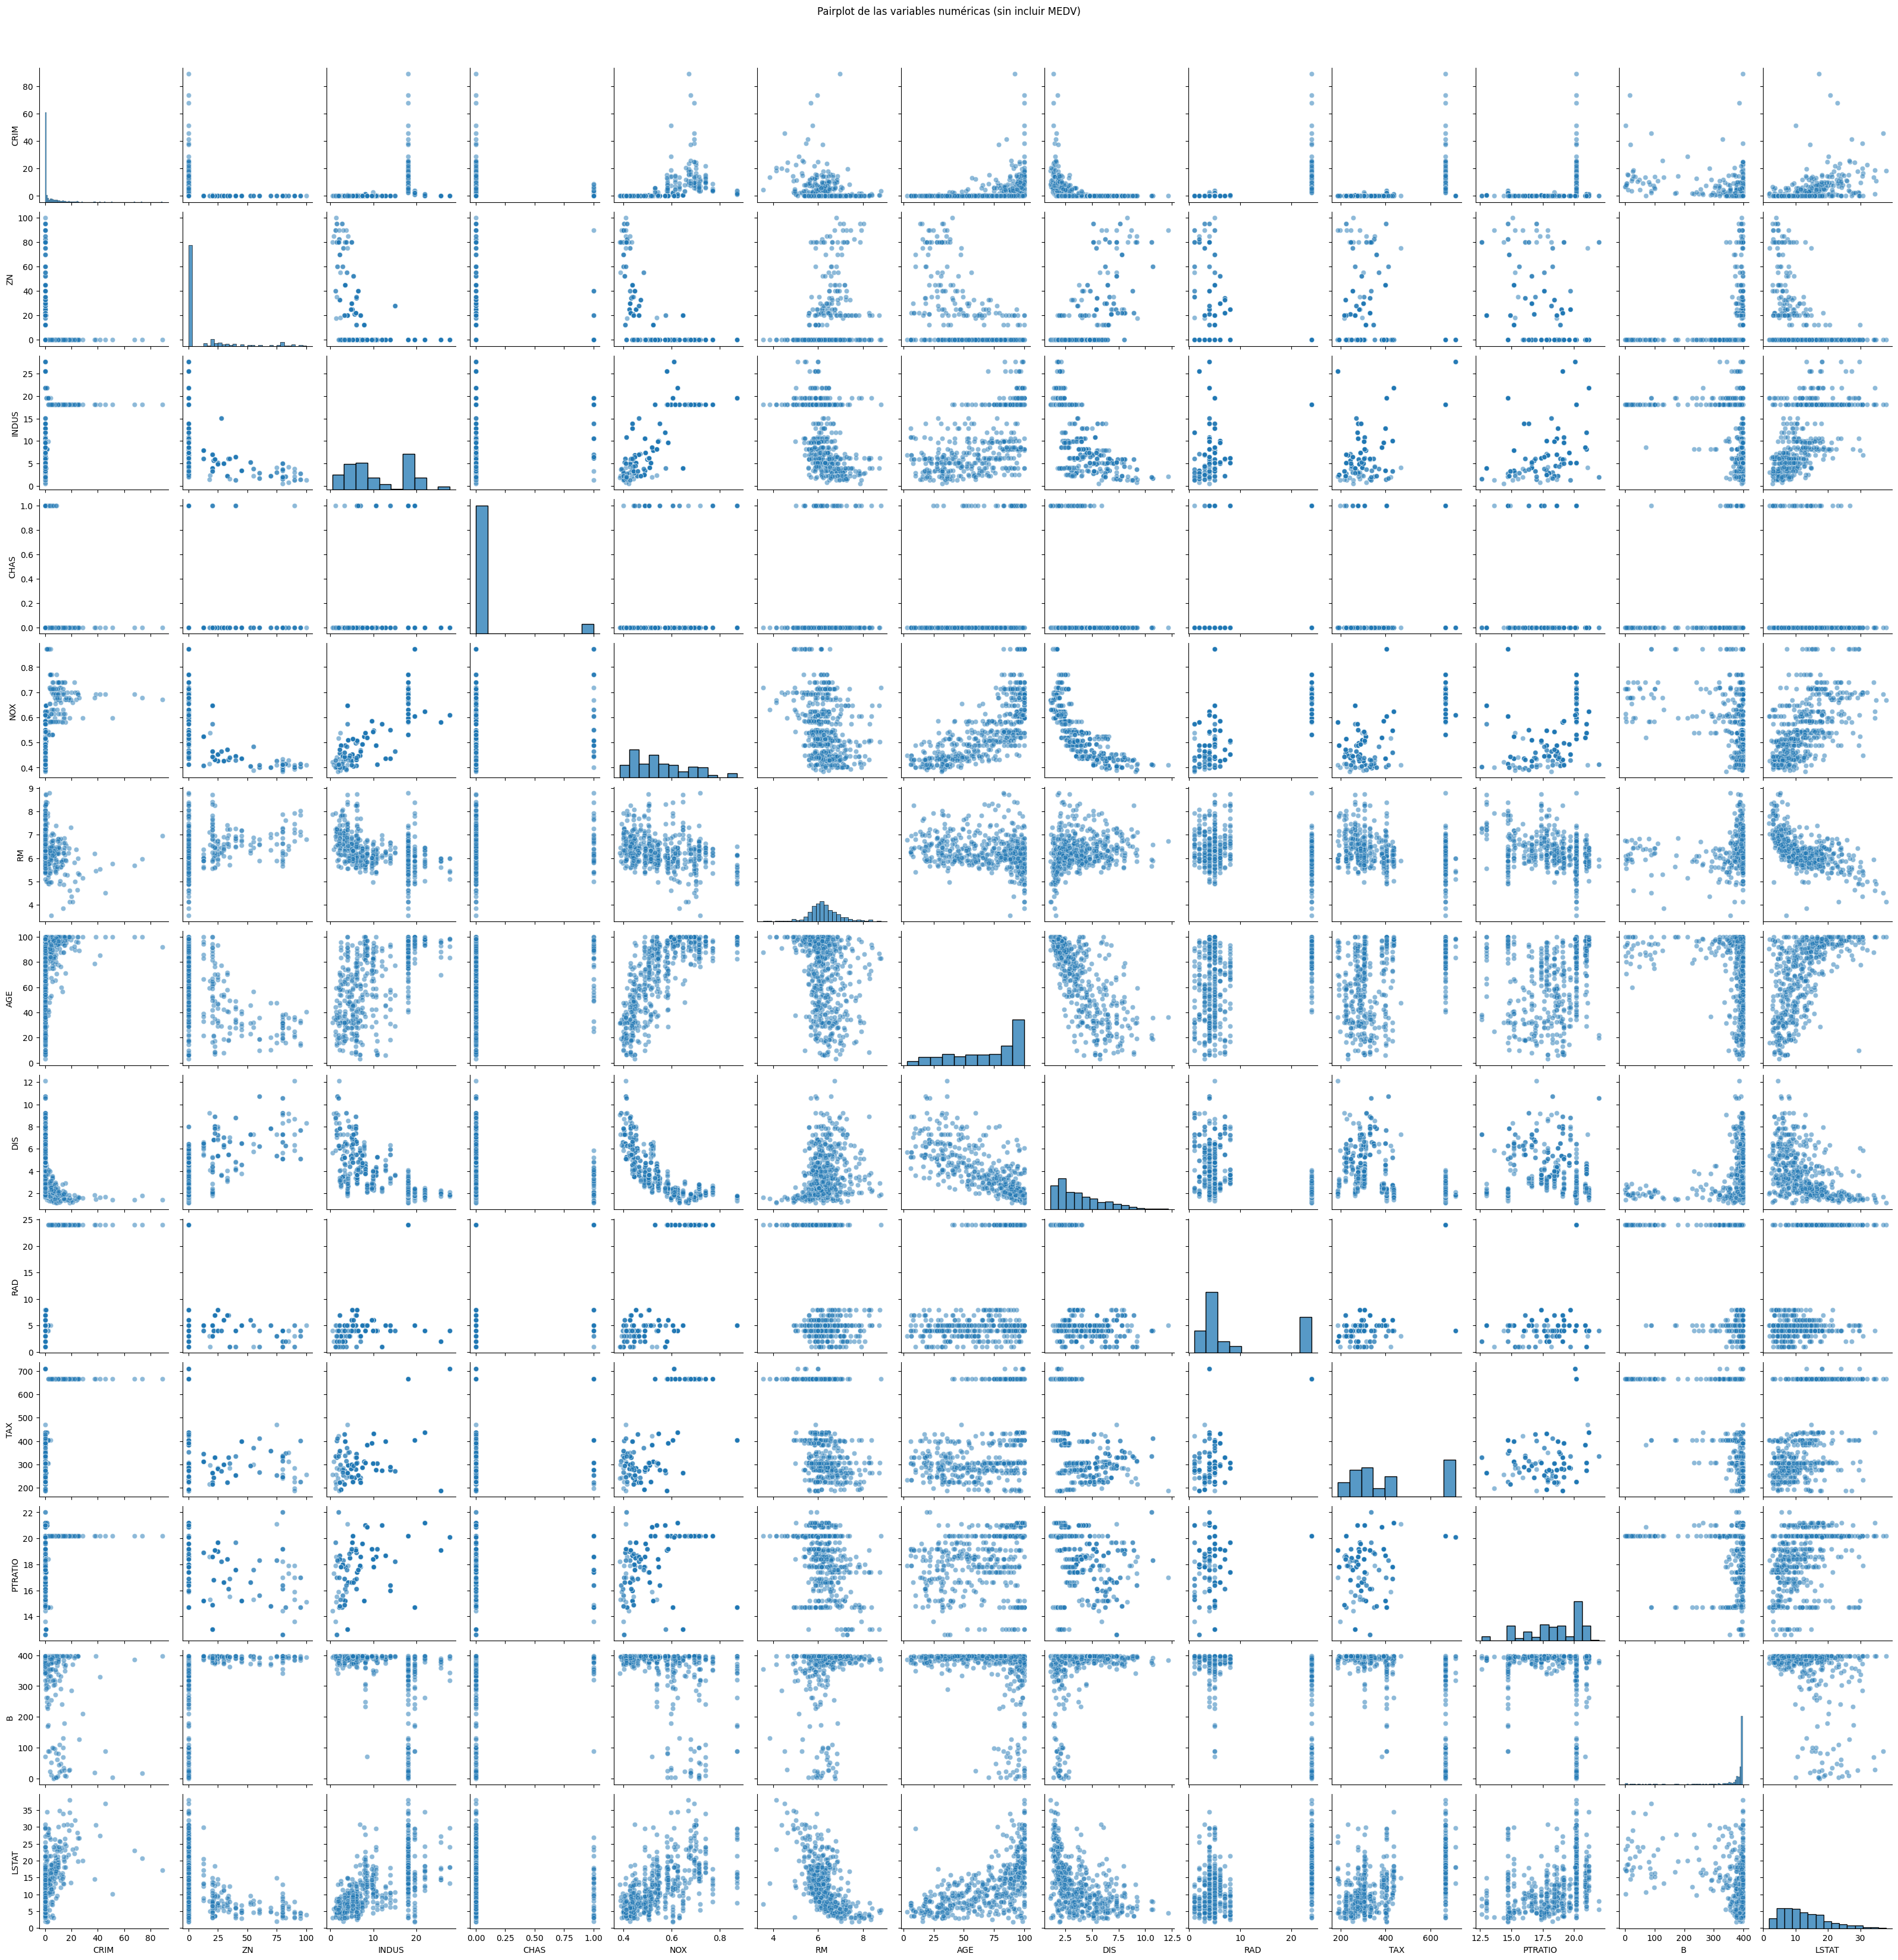

In [78]:
df_smedv = df.drop(columns=["MEDV"])
sns.pairplot(df_smedv, diag_kind="hist", plot_kws={"alpha":0.5})
plt.suptitle("Pairplot de las variables numéricas (sin incluir MEDV)", y=1.02)
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Identifica los 2 atributos con la correlación más fuerte con la variable respuesta y los 2 con la correlación más débil (considerando el valor absoluto del coeficiente de correlación).
    
Para analizar las correlaciones gráficamente, representa, para cada uno de los 4 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, añade en cada gráfico una regresión lineal que ajuste los puntos.
        
<hr>Sugerencia: Puedes usar la función "regplot" de la librería 'seaborn'.
</div>


In [65]:
corr = df.corr(numeric_only=True)["MEDV"]
corr_abs = corr.abs().sort_values(ascending=False)
top2 = corr_abs.index[1:3]
bottom2 = corr_abs.index[-2:]
print(corr_abs.loc[top2])
print(corr_abs.loc[bottom2])
print("\nLos 2 atributos MÁS correlacionados con MEDV:")
print(top2)
print("\nLos 2 atributos MENOS correlacionados con MEDV:")
print(bottom2)

LSTAT    0.737663
RM       0.695360
Name: MEDV, dtype: float64
DIS     0.249929
CHAS    0.175260
Name: MEDV, dtype: float64

Los 2 atributos MÁS correlacionados con MEDV:
Index(['LSTAT', 'RM'], dtype='object')

Los 2 atributos MENOS correlacionados con MEDV:
Index(['DIS', 'CHAS'], dtype='object')


- Scatterplot

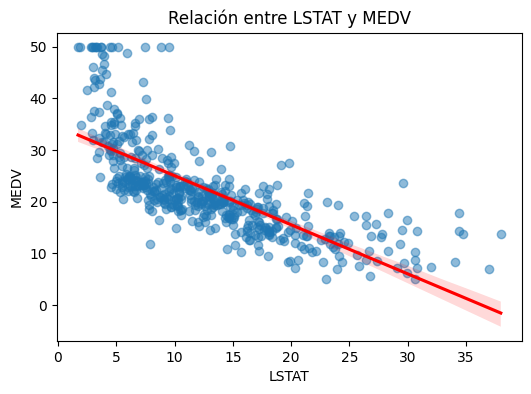

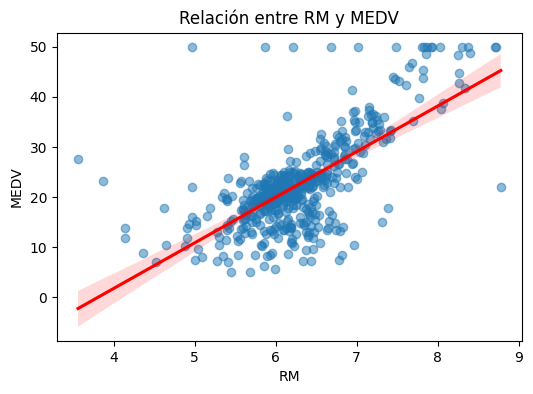

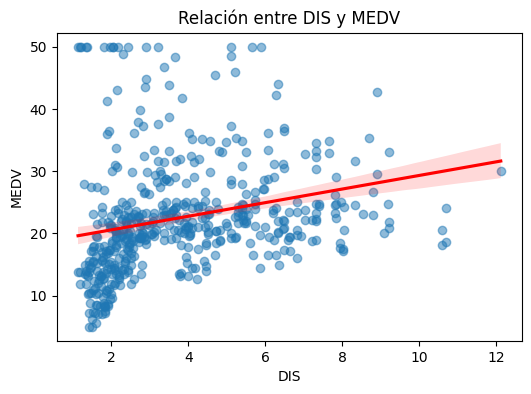

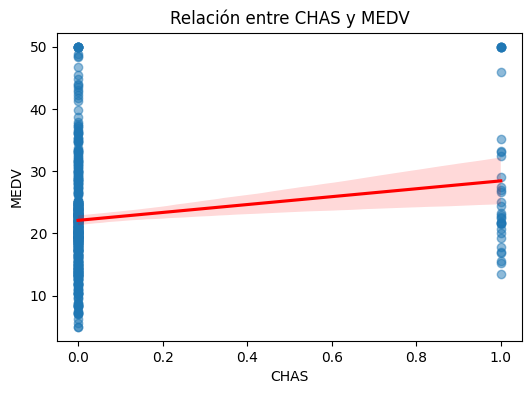

In [66]:
atributos = ["LSTAT", "RM", "DIS", "CHAS"]

for attr in atributos:
    plt.figure(figsize=(6,4))
    sns.regplot(x=df[attr], y=df["MEDV"], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f"Relación entre {attr} y MEDV")
    plt.xlabel(attr)
    plt.ylabel("MEDV")
    plt.grid(False)
    plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los gráficos, comenta brevemente si logras visualizar las correlaciones altas o bajas que identificaste numéricamente.
</div>


Se puede observaren el caso de LSTAT una relación negativa (0.73) se peude reflejar visualmente en una nubes de puntos que desciende de forma marcada, se puede decir que a mayor porcentaje de población de bajo status, menor es el valor de las viviendas, así lo confirma la linea de tendencia. Parecido para RAM, la correlación es positiva, tiene un patron ascendente, y da a entender que las viviendas con más habitaciones tienen precios más altos

En cuanto a los atributos de correlación débil muestra relaciones menos claras, en DIS existe una ligera tendencia pero los puntos está muy dispersos, por lo que su capacidad predictiva con MEDV es limitada. Y con CHAS tiene una linea de regresión plana, lo que indica que aunue las viviendas cerca del río tienes a ser un poco más caras, la relación es débil no lineal

---
## <font color='264CC7'> Reducción de la dimensionalidad </font>


En este ejercicio aplicaremos métodos de reducción de dimensionalidad al conjunto original de datos. El objetivo es reducir el número de atributos a un nuevo conjunto con menos dimensiones, pero que conserven la máxima información posible presente en los atributos originales.


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica el método de reducción de dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Genera un gráfico con el resultado del PCA, mostrando los valores de las dos componentes principales en los ejes x e y, y utilizando una escala de colores para representar el valor de la respuesta MEDV. El objetivo es visualizar cómo varía MEDV en función de las componentes principales generadas.</li>
</ul>
    
NOTA: Asegúrate de no incluir la variable objetivo "MEDV" en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: No necesitas programar el algoritmo de PCA desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


In [72]:
X = df.drop(columns=["MEDV"])
y = df["MEDV"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["MEDV"] = y

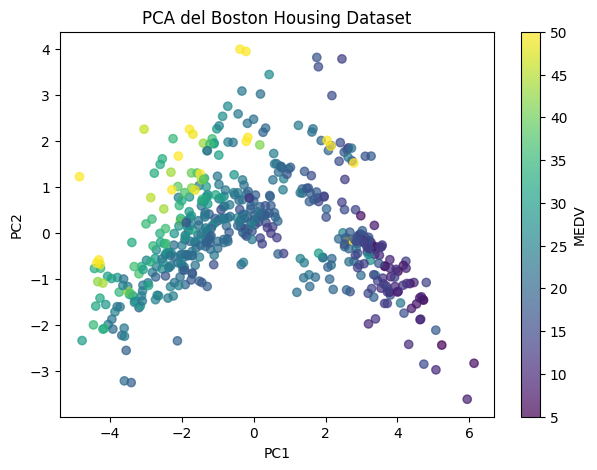

In [76]:
plt.figure(figsize=(7,5))
scatter = plt.scatter(df_pca["PC1"], df_pca["PC2"],
                      c=df_pca["MEDV"], cmap="viridis", alpha=0.7)

plt.colorbar(scatter, label="MEDV")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA del Boston Housing Dataset")
plt.show()

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplica la reducción de dimensionalidad usando TSNE. Puedes encontrar más información sobre este algoritmo en el siguiente enlace: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, genera un gráfico con el resultado del TSNE, mostrando en los ejes x e y los valores de las 2 nuevas dimensiones, y utiliza una escala de colores para representar el valor de la respuesta MEDV.</li>
</ul>

<hr>
Sugerencia: No necesitas programar el algoritmo TSNE desde cero, puedes usar la implementación disponible en la librería "scikit-learn".<br>
Sugerencia: Además de especificar el número de componentes, experimenta con los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: Para el gráfico, utiliza el scatter plot de matplotlib con el parámetro "c" para asignar los colores de los puntos según los valores de la variable objetivo.
</div>


In [79]:
from sklearn.manifold import TSNE

In [82]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=1)
X_tsne = tsne.fit_transform(X_scaled)

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [83]:
df_tsne = pd.DataFrame(X_tsne, columns=["TSNE1", "TSNE2"])
df_tsne["MEDV"] = y

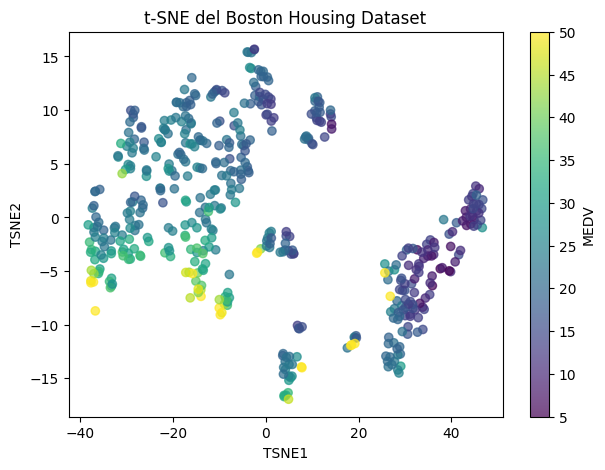

In [85]:
plt.figure(figsize=(7,5))
scatter = plt.scatter(df_tsne["TSNE1"], df_tsne["TSNE2"],
                      c=df_tsne["MEDV"], cmap="viridis", alpha=0.7)

plt.colorbar(scatter, label="MEDV")
plt.title("t-SNE del Boston Housing Dataset")
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.show()


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong>
<br> Observando los dos gráficos, ¿consideras que la reducción de dimensionalidad ha funcionado adecuadamente? ¿Crees que las 2 nuevas dimensiones logran explicar la variación de MEDV y permiten visualizar de manera diferenciada los precios altos y bajos? Si utilizáramos las 2 nuevas variables para predecir MEDV, ¿con cuál de los dos métodos de reducción de dimensionalidad (PCA o TSNE) obtendríamos mejores resultados?
    
¿Por qué crees que obtenemos resultados tan diferentes entre ambos métodos?
</div>


En el gráfico del **PCA** se ve una estructura relativamente continua donde los valoes de MEDV siguen un gradeinet definido, los precios más altos se agrupan en la zona izquierda de PC1, mientras que los valores bajos a la derecha. Poodemos decir que las dos primeras componentes principales capturan una parte significativa de la variabilidadd relacionada para con el precio de la vivienda. Con PCA si se logra proyectar infromación relevante de MEDV en estas dos diemensioes

En cuanto al grafico **t-SNE** muestra como agrupaicones desconectadas, pero si se puede identificar zonas donde se encuentras los valores altos o bajos de MEDV, pero esta eparación no muy lineal, no conserva relaciones glbales ni distancias absolutas, lo que produce como un mapa fragmentado y menos interpretable

---
## <font color='264CC7'> Entrenamiento y test </font>

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Linear Regression y K-means, para predecir las variables MEDV y CHAS, resectivamente, y evaluar la precisión obtenida con los modelo. Para eso usaremos:
<ul>
    <li>El conjunto de datos original con todos los atributos</li>
    <li>El conjunto de datos reducido a sólo 2 atributos con PCA</li>
</ul>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

### <font color='264CC7'> Regresión </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo Linear Regression.</li>
    <li>Aplica validación cruzada con el modelo definido y el dataset de train (con cv=5 es suficiente).</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza R2 (coeficiente de determinación) y MAE (media del error absoluto) separadamente.</li>
    <li>Calcula la media y la desviación estándar del error obtenido en cada caso.</li>
</ul>
    
<hr>
Sugerencia: Para aplicar validación cruzada, utiliza 'cross_val_score' de sklearn y modifica su parámetro 'scoring' si es necesario.<br>
</div>


- Para la división train-test

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7)

print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

Dimensiones del conjunto de entrenamiento: (404, 13)
Dimensiones del conjunto de prueba: (102, 13)


- Definir el modelo de regresión

In [97]:
model = LinearRegression()

r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print("Resultados R2:", r2_scores)
print("Media R2:", np.mean(r2_scores))
print("Desviación estándar R2:", np.std(r2_scores))

Resultados R2: [0.75919627 0.67895719 0.71499588 0.79380619 0.81032233]
Media R2: 0.751455574522408
Desviación estándar R2: 0.048793673223333243


In [96]:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mae_scores = cross_val_score(model, X_train, y_train, cv=5, scoring=mae_scorer)

print("\nResultados MAE:", mae_scores)
print("Media MAE:", np.mean(mae_scores))
print("Desviación estándar MAE:", np.std(mae_scores))


Resultados MAE: [-3.06568491 -3.58593686 -3.40148677 -3.03519649 -2.95464511]
Media MAE: -3.2085900284186097
Desviación estándar MAE: 0.24272412225860618


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [101]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_reducido = X_pca

In [103]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_reducido, y, test_size=0.2, random_state=7)

print("Dimensiones train (PCA):", X_train_pca.shape)
print("Dimensiones test (PCA):", X_test_pca.shape)

Dimensiones train (PCA): (404, 2)
Dimensiones test (PCA): (102, 2)


In [104]:
model_pca = LinearRegression()

r2_pca = cross_val_score(model_pca, X_train_pca, y_train_pca, cv=5, scoring='r2')
print("R2 por fold:", r2_pca)
print("Media R2:", np.mean(r2_pca))
print("Desviación estándar R2:", np.std(r2_pca))

R2 por fold: [0.60274967 0.34974078 0.37410239 0.56132163 0.52199152]
Media R2: 0.4819811989249227
Desviación estándar R2: 0.10159342333540092


In [105]:
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)
mae_pca = cross_val_score(model_pca, X_train_pca, y_train_pca, cv=5, scoring=mae_scorer)

print("\nMAE por fold:", mae_pca)
print("Media MAE:", np.mean(mae_pca))
print("Desviación estándar MAE:", np.std(mae_pca))


MAE por fold: [-4.29320426 -5.31646681 -5.31934155 -4.42523952 -4.78680548]
Media MAE: -4.828211524581301
Desviación estándar MAE: 0.4312622362571977


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Con qué datos ha funcionado mejor el modelo? ¿Tiene sentido el resultado? ¿Está alineado con los resultados observados en el ejercicio 3?
</div>


El modelo funciona mejor cuandoo utiliza las variables originales, eso se representa en el R2 más alto (0.75) y MAE más bajo (-3.20), y cuando se reduce el conjuntode datos a 2 componentes principales el rendimiento baja R2 con 0.48 y MAE con 0.43.

En el ejercicio 3, la visualización del PCA, los valores de MEDV no quedaban completamente separados en el plano PC1–PC2, lo que anticipaba un rendimiento predictivo menor con el dataset reducido

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Con el mejor modelo que hayas obtenido:
    
<ul>
  <li>Genera predicciones sobre el dataset de test.</li>
  <li>Calcula la precisión de las predicciones obtenidas usando R2 (coeficiente de determinación) y MAE (media del error absoluto).</li>
</ul>

<hr>
Sugerencia: Para calcular R2 y MAE, utiliza las funciones disponibles en el módulo "metrics" de sklearn.
</div>


In [107]:
mj_model = LinearRegression()
mj_model.fit(X_train, y_train)

LinearRegression()

In [109]:
y_pred = mj_model.predict(X_test)

In [110]:
r2_test = r2_score(y_test, y_pred)
mae_test = mean_absolute_error(y_test, y_pred)

print("R2 en test:", r2_test)
print("MAE en test:", mae_test)

R2 en test: 0.5785415472763393
MAE en test: 3.7807629091749733


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (R2 o MAE) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué?  
</div>


Para un ejecutivo de una **inmobiliaria**, la métrica más adecuada es el MAE, ya que expresa el error del modelo en términos monetarios (en este caso, alrededor de 3.78 mil dólares por vivienda), lo cual es directo y permite evaluar si el margen de error es aceptable para el negocio. Mientras que para un **analista matemático** es más apropiado utilizar R², porque indica qué proporción de la variabilidad del precio está explicada por el modelo y permite comparar diferentes configuraciones o técnicas estadísticas. De este modo, MAE comunica mejor el impacto práctico del error, mientras que R² describe la calidad técnica del ajuste del modelo.



### <font color='264CC7'> Clasificación </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Usando el conjunto de datos original:
    
<ul>
    <li>Divide el dataset en train y test.</li>
    <li>Define un modelo K-means.</li>
    <li>Como métricas para cuantificar el error del modelo, utiliza la precisión, la sensibilidad y f1-score.</li>
</ul>



In [111]:
X = df.drop(columns=["CHAS"])
y = df["CHAS"]

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7)

print("Train:", X_train.shape)
print("Test:", X_test.shape)

Train: (404, 13)
Test: (102, 13)


In [114]:
from sklearn.cluster import KMeans

In [115]:
kmeans = KMeans(n_clusters=2, random_state=7)
kmeans.fit(X_train)
train_clusters = kmeans.labels_

In [121]:
cluster_to_class = {}

for cluster in np.unique(train_clusters):
    clases = y_train[train_clusters == cluster]
    cluster_to_class[cluster] = clases.mode()[0]

cluster_to_class
test_clusters = kmeans.predict(X_test)
y_pred = [cluster_to_class[c] for c in test_clusters]

In [122]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)   # sensibilidad
f1  = f1_score(y_test, y_pred)

print("Precisión:", acc)
print("Sensibilidad:", rec)
print("F1-score:", f1)


Precisión: 0.9313725490196079
Sensibilidad: 0.0
F1-score: 0.0


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
Repite el mismo procedimiento que en el ejercicio anterior, pero utilizando el dataset reducido a 2 dimensiones con PCA.
</div>


In [123]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_reducido, df["CHAS"], test_size=0.2, random_state=7)

print("Train PCA:", X_train_pca.shape)
print("Test PCA:", X_test_pca.shape)

Train PCA: (404, 2)
Test PCA: (102, 2)


In [124]:
kmeans_pca = KMeans(n_clusters=2, random_state=7)
kmeans_pca.fit(X_train_pca)

train_clusters_pca = kmeans_pca.labels_

In [126]:
cluster_to_class_pca = {}

for cluster in np.unique(train_clusters_pca):
    clases_cluster = y_train[train_clusters_pca == cluster]
    cluster_to_class_pca[cluster] = clases_cluster.mode()[0]

cluster_to_class_pca
test_clusters_pca = kmeans_pca.predict(X_test_pca)
y_pred_pca = [cluster_to_class_pca[c] for c in test_clusters_pca]

In [128]:
acc_pca = accuracy_score(y_test, y_pred_pca)
rec_pca = recall_score(y_test, y_pred_pca)
f1_pca  = f1_score(y_test, y_pred_pca)

print("Precisión PCA:", acc_pca)
print("Sensibilidad PCA:", rec_pca)
print("F1-score PCA:", f1_pca)

Precisión PCA: 0.9313725490196079
Sensibilidad PCA: 0.0
F1-score PCA: 0.0


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Análisis:</strong><br>
¿Cuál de las dos métricas propuestas para evaluar los modelos (precisión, sensibilidad o f1-score) usarías para explicar la calidad del modelo a un ejecutivo de una inmobiliaria? ¿Y cuál usarías para explicarlo a un analista matemático de la misma compañía? ¿Por qué? ¿El modelo es mejor discriminando o acertando? ¿Cómo se interpreta esto último?


Para un ejecutivo de una **inmobiliaria**, la métrica más adecuada para evaluar el modelo es la precisión, porque indica de forma simple cuántas veces el modelo acierta en general, y es fácil de interpretar sin conocimientos técnicos. Para un** analista matemático **resulta más informativa la sensibilidad o el F1-score, ya que estas métricas revelan si el modelo es capaz de identificar correctamente la clase minoritaria (CHAS = 1)

En este caso, aunque la precisión es alta (93% aprox), la sensibilidad y el F1-score son 0, lo que significa que el modelo no detecta ningún caso positivo. Esto muestra que el modelo acierta mucho, pero no discrimina bien, es decir, predice casi siempre la clase mayoritaria y por eso parece funcionar bien según la precisión, pero en realidad es incapaz de diferenciar viviendas cercanas del río

El modelo no es útil para la tarea de clasificación, ya que su buen desempeño aparente se debe únicamente al desbalance de clases y no a una verdadera capacidad predictiva.